<a href="https://colab.research.google.com/github/davidandw190/faas-dl-inference/blob/main/notebooks/face_gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Face Gender Detection

In [6]:
!pip install opencv-python numpy matplotlib pillow

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [8]:
model_path = "gender_googlenet.caffemodel"
config_path = "gender_googlenet.prototxt"

try:
    net = cv2.dnn.readNet(model_path, config_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {str(e)}")
    raise

gender_labels = ['Male', 'Female']

Model loaded successfully.


In [9]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blob = cv2.dnn.blobFromImage(image, 1.0, (224, 224), (104, 117, 123), swapRB=False)
    return blob

In [10]:
def predict_gender(image_path):
    blob = preprocess_image(image_path)
    net.setInput(blob)
    output = net.forward()
    gender_index = output[0].argmax()
    gender = gender_labels[gender_index]
    confidence = output[0][gender_index]
    return gender, confidence

In [11]:
def process_image(image_path, title):
    gender, confidence = predict_gender(image_path)

    img = Image.open(image_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{title}\nPredicted Gender: {gender} (Confidence: {confidence:.2f})")
    plt.show()

    print(f"Predicted Gender: {gender}")
    print(f"Confidence: {confidence:.2f}")

In [12]:
def test_on_sample_images(image_directory):
    if not os.path.exists(image_directory):
        print(f"Error: Directory {image_directory} does not exist.")
        return

    for filename in os.listdir(image_directory):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(image_directory, filename)
            print(f"\nProcessing image: {filename}")
            process_image(image_path, filename)


Testing on sample images:

Processing image: man_face.jpg


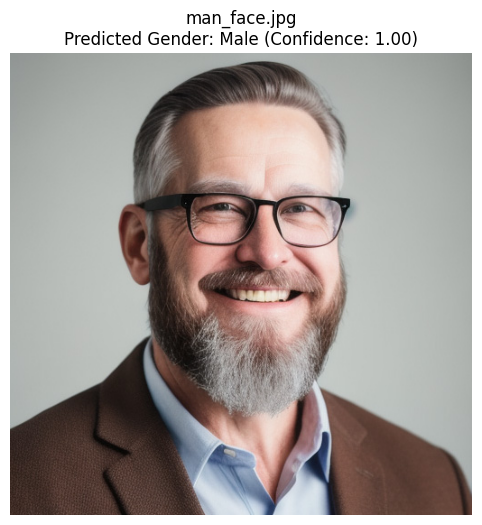

Predicted Gender: Male
Confidence: 1.00

Processing image: multiple_faces.jpeg


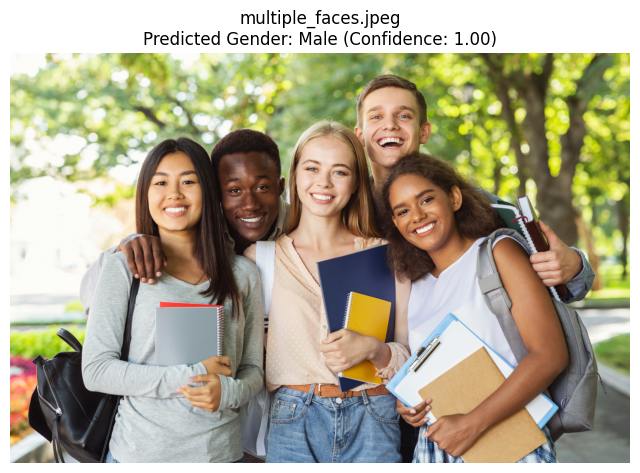

Predicted Gender: Male
Confidence: 1.00

Processing image: woman_face.jpg


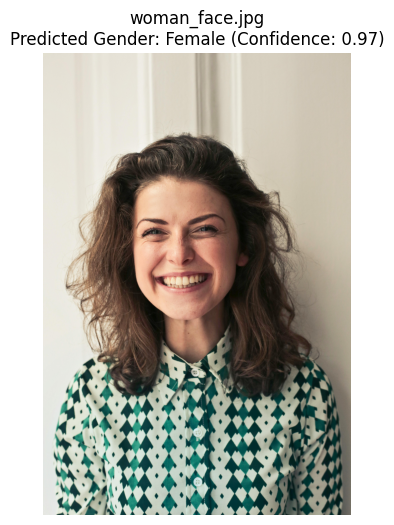

Predicted Gender: Female
Confidence: 0.97


In [13]:
test_image_directory = "test_images"

if not os.path.exists(test_image_directory):
    os.makedirs(test_image_directory)
    print(f"Created directory: {test_image_directory}")

print("\nTesting on sample images:")
test_on_sample_images(test_image_directory)